## 4 Steps to build a machine learning model
- Step 1: Collect the relevant data (the data points)
- Step 2: Choose a suitable model (linear regression for example)
- Step 3: Choose a loss function with respect to the data (such as SSE)
- Step 4: Minimize the loss function with respect to the parameters using an optimization algorithm (Gradient Descent)


### Outline
- Break the ice
- Linear Regression & Logistic Regression
- Neural Network
- Demo Time


![Regression](images/regression.PNG)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
![Classification](images/classification.PNG)

#### Algorithms
- Linear Regression
    + Univariate Linear Regression (1 variable)
- Logistic Regression

## I. Linear Regression
### 1. Basic idea of Univariate LR
Given some data points (x, y)\
We find the red line y = wx + b that best describe / fit the data!\
![univariate](images/univariate_lr.PNG)

### 2. What does it mean by "best fit"?
#### It's just an optimization problem
We define a function with respect to w and b, called the loss function L, for instance
![loss_function](images/loss_func.PNG)\
The best fit line is the line with minimum value loss function!\
$w$, $b$ = argmin $L$($w$, $b$)


### 3. Two optimization approach
- Using calculus 2 to find the closed-form formula (not always possible)
- Iterative algorithm: <b>Gradien Descent</b>

##### Formula derivation using Calculus 2
Step 1: Compute the gradient <br>

![gradienFunc1](images/gradient_func1.PNG) <br>

Step 2: Find stationary points by letting the gradient zero: <br>

![gradienFunc2](images/gradient_func2.PNG) <br>
##### Using Gradient Descent
Loop 7749 times: <br>

![gradienFunc3](images/gradient_func3.PNG) <br>

- $\alpha$ is the learning rate <br>
##### The influence of learning Rate
![learningrate](images/learning_rate.PNG)

## II. Logistic Regression

### 1. Sigmoid function, an activation function
Sometime we want the output of the function to be:\
    + Strictly increasing and analytical\
    + Bounded in (0, 1) to be probabilistic \
The sigmoid function is a perfect fit for both of these\

![sigmoid](images/sigmoid.PNG)



### 2. Logistic regression idea
#### 2.1 Basically, that’s sigmoid(linear regression)
In logistic regression, we apply sigmoid function on top of linear regression in order to squeeze output range into (0, 1)

#### 2.2 Binary cross entropy
##### Note: Multiclass variant of this is cross entropy
Formula of binary cross entropy

![binaryCrossEntropy](images/binary_cross_entropy.PNG)\
In short, by using this loss function, the loss function is now convex.


## III. Neural Network
- Basically, it is a complex function (a combination of many functions) to solve a complex task.

![neural_network](images/neural_network.PNG)

### 1. Activation Function
![activation](images/activation.PNG)

### 2. Neural Network Steps
Step 1: Determine the network structure (the number of layers, which activation functions to choose).

Step 2: Load the data as input to the Neural Network

Repeat {\
Step 3: Forward the data through the network, calculate the Loss function.\
Step 4: Backpropagation to find the weight gradients → update the weights.\
} Until convergence. (hội tụ)


### 3. Universal Approximation Theorem

“The result of a Neural Network can approximate any well-behaved function 𝟋  by using the same construction for the first layer and approximating the identity function with later layers.”


### 4. State-of-the-art Neural Network
- Convolutional Neural Network: Mạng nơ ron tích chập
- Recurrent Neural Network: Mạng nơ ron hồi quy


## Code

### Keras
https://keras.io/

Created by: [François Chollet](https://fchollet.com/)

### Fashion MNIST
#### Prepare the data
- Reference: https://keras.io/api/datasets/fashion_mnist/

- ```x_train```: NumPy array of grayscale image data: shapes **(60000, 28, 28)**. Pixel values range from **0 to 255**.

- ```y_train```: NumPy array of digit labels (integers in range 0-9): shape **(60000,)**.

- ```x_test```: NumPy array of grayscale image data: shapes **(10000, 28, 28)**. Pixel values range from **0 to 255**.

- ```y_test```: NumPy array of digit labels (integers in range 0-9): shape **(10000,)**.


- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [23]:
import tensorflow
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [24]:
num_classes = 10

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

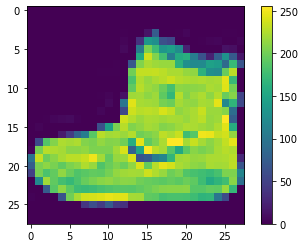

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

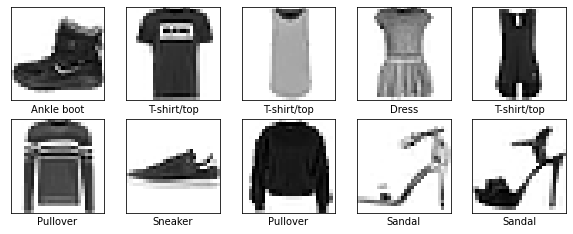

In [26]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [27]:
# Normalizing pixels
# pixel goes from 0 to 255, then divided to 255 so we have it goes from 0 to 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
60000 train samples
10000 test samples


### Build the model

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(64,activation="relu"),
    # bai toan nhieu hon 2 label thi dung softmax de phan loai
    keras.layers.Dense(num_classes,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [29]:
# chia nho data dau vao
# VD: input la 128 buc hinh => chia thanh 2 batch gom 64 buc hinh
batch_size = 64

epochs = 15

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [30]:
model.fit(x_train, y_train,batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
844/844 [==============================] - 3s 4ms/step - loss: 0.5021 - accuracy: 0.8230 - val_loss: 0.4184 - val_accuracy: 0.8543
Epoch 2/15
844/844 [==============================] - 3s 4ms/step - loss: 0.3677 - accuracy: 0.8672 - val_loss: 0.3498 - val_accuracy: 0.8713
Epoch 3/15
844/844 [==============================] - 3s 4ms/step - loss: 0.3292 - accuracy: 0.8799 - val_loss: 0.3399 - val_accuracy: 0.8787
Epoch 4/15
844/844 [==============================] - 3s 4ms/step - loss: 0.3063 - accuracy: 0.8861 - val_loss: 0.3481 - val_accuracy: 0.8710
Epoch 5/15
844/844 [==============================] - 3s 4ms/step - loss: 0.2890 - accuracy: 0.8923 - val_loss: 0.3249 - val_accuracy: 0.8855
Epoch 6/15
844/844 [==============================] - 3s 4ms/step - loss: 0.2733 - accuracy: 0.8982 - val_loss: 0.3201 - val_accuracy: 0.8843
Epoch 7/15
844/844 [==============================] - 3s 4ms/step - loss: 0.2594 - accuracy: 0.9029 - val_loss: 0.3243 - val_accuracy: 0.8798
Epoch 

### Evaluate the trained model

In [31]:
score = model.evaluate(x_test, y_test)

print(f"Loss: {score[0]}")
print(f"Accuracy: {score[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.8897
Loss: 0.33682551980018616
Accuracy: 0.8896999955177307


In [32]:
predictions = model.predict(x_test)

In [33]:
import numpy as np

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

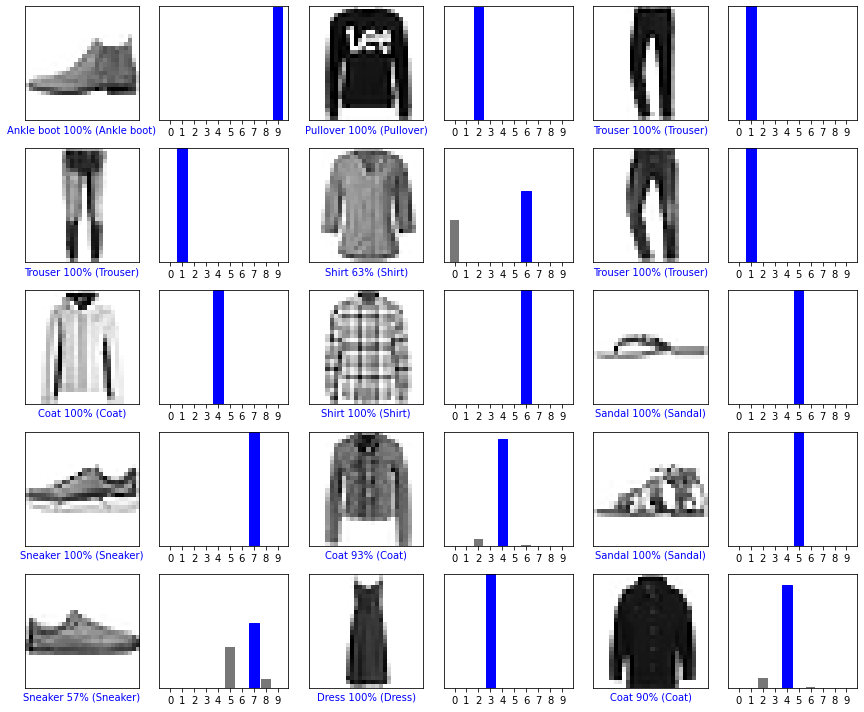

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

### CIFAR-10
#### Prepare the data
- ```x_train```: NumPy array of grayscale image data: shapes **(50000, 32, 32, 3)**. Pixel values range from **0 to 255**.

- ```y_train```: NumPy array of digit labels (integers in range 0-9): shape **(50000, 1)**.

- ```x_test```: NumPy array of grayscale image data: shapes **(10000, 32, 32, 3)**. Pixel values range from **0 to 255**.

- ```y_test```: NumPy array of digit labels (integers in range 0-9): shape **(10000, 1)**.

- 0	airplane
- 1	automobile
- 2	bird
- 3	cat
- 4	deer
- 5	dog
- 6	frog
- 7	horse
- 8	ship
- 9	truck

In [35]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 314s 2us/step


In [36]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

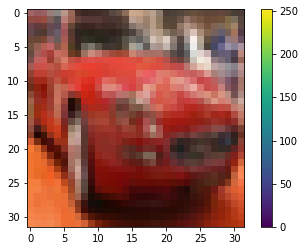

In [37]:
plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

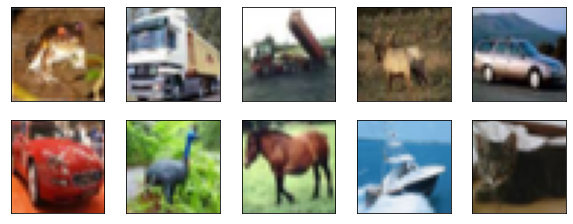

In [38]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [39]:
# Normalizing pixels
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


### Build the model

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)), #RGB : Red Green Blue
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()
# 32 x 32 x 3 = 3072
# (3072 + 1 (bias)) x 256 = 786688
# (256 + 1 (bias)) x 64 = 16448
# (64 + 1 (bias)) x 10 = 650

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 803,786
Trainable params: 803,786
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [41]:
batch_size = 64
epochs = 15

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
704/704 [==============================] - 7s 10ms/step - loss: 1.8963 - accuracy: 0.3217 - val_loss: 1.8052 - val_accuracy: 0.3522
Epoch 2/15
704/704 [==============================] - 6s 9ms/step - loss: 1.7300 - accuracy: 0.3822 - val_loss: 1.6984 - val_accuracy: 0.3876
Epoch 3/15
704/704 [==============================] - 6s 9ms/step - loss: 1.6422 - accuracy: 0.4132 - val_loss: 1.6293 - val_accuracy: 0.4258
Epoch 4/15
704/704 [==============================] - 6s 9ms/step - loss: 1.5892 - accuracy: 0.4331 - val_loss: 1.5992 - val_accuracy: 0.4254
Epoch 5/15
704/704 [==============================] - 6s 9ms/step - loss: 1.5525 - accuracy: 0.4449 - val_loss: 1.5765 - val_accuracy: 0.4460
Epoch 6/15
704/704 [==============================] - 7s 9ms/step - loss: 1.5216 - accuracy: 0.4561 - val_loss: 1.5513 - val_accuracy: 0.4486
Epoch 7/15
704/704 [==============================] - 7s 10ms/step - loss: 1.4905 - accuracy: 0.4692 - val_loss: 1.5305 - val_accuracy: 0.4502
Epoc

### Evaluate the trained model

In [42]:
score = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 - 1s - loss: 1.5009 - accuracy: 0.4752
Test loss: 1.5009245872497559
Test accuracy: 0.47519999742507935


In [43]:
prediction = model.predict(x_test)

In [44]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[np.max(true_label)],
                                color=color))

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.max(true_label)].set_color('blue')

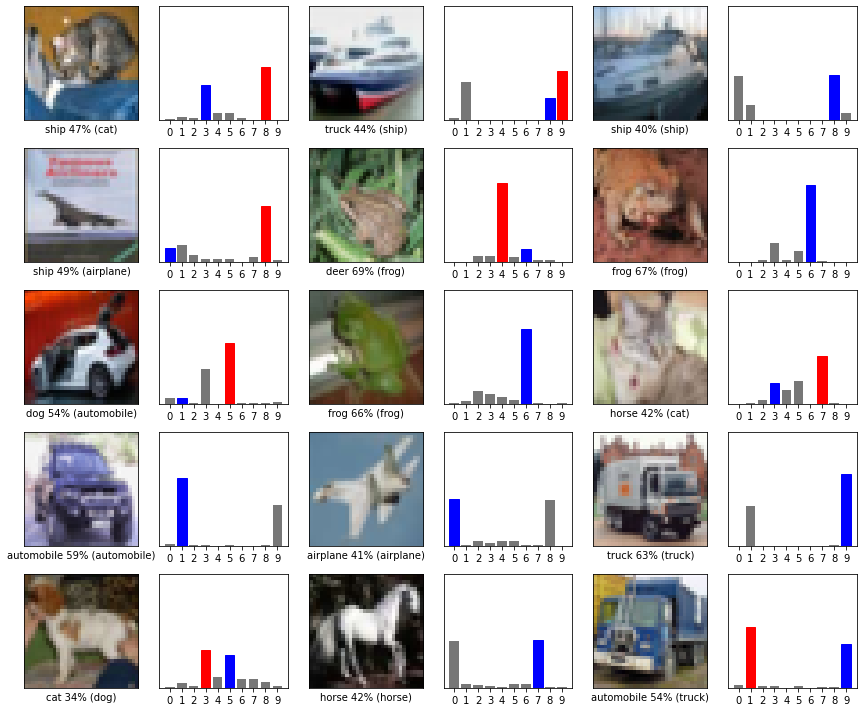

In [45]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], y_test)
plt.tight_layout()
plt.show()

In [47]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[464  96  13  19  34  35  18  36 227  58]
 [ 15 694   1  18   3  18  10  26  80 135]
 [ 90  55 112 112 197 136  96 100  79  23]
 [ 14  53  13 330  55 235  90  78  74  58]
 [ 47  24  36  68 425  72 113 120  74  21]
 [ 20  36  15 198  55 401  72  91  86  26]
 [  5  45  26 135 116  80 506  38  24  25]
 [ 35  40  14  66  59  70  22 564  49  81]
 [ 57 101   0  18  10  12   4  10 714  74]
 [ 20 252   5  33   9  20  21  28  70 542]]


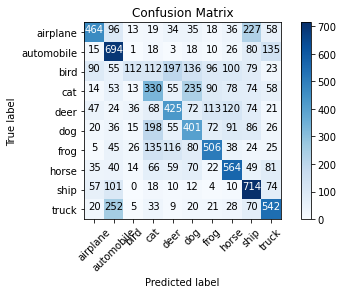

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, prediction.argmax(axis=1))
plot_confusion_matrix(cm=matrix, classes=class_names, title='Confusion Matrix')